In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 9.7MB/s 
     |████████████████████████████████| 4.3MB 62.2MB/s 


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 267M/271M [00:07<00:00, 54.7MB/s]
100% 271M/271M [00:07<00:00, 38.0MB/s]
 99% 537M/543M [00:08<00:00, 66.1MB/s]
100% 543M/543M [00:08<00:00, 65.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 73.6MB/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import os
print(os.listdir('.'))

['.config', 'sampleSubmission.csv', 'test1.zip', 'train.zip', 'kaggle.json', 'drive', 'sample_data']


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall("/data")
zip_ref.close()

In [10]:
os.listdir('/data')

['train']

In [11]:
my_path = '/data/train/'
filename = [f for f in os.listdir(my_path) if f if os.path.isfile(os.path.join(my_path, f))]
print(len(filename))

25000


**Exporting the data to folders**

In [0]:
dogs_train_data = '/data/training/dogs/'
dogs_validation_data = '/data/validation/dogs/'
cats_train_data = '/data/training/cats/'
cats_validation_data = '/data/validation/cats/'

In [0]:
import shutil
import cv2
import matplotlib.pyplot as plt

In [0]:
def make_dir(directory):
  if(os.path.exists(directory)):
    shutil.rmtree(directory)
  os.makedirs(directory)

In [0]:
make_dir(dogs_train_data)
make_dir(dogs_validation_data)
make_dir(cats_train_data)
make_dir(cats_validation_data)

In [21]:
print(os.listdir('/data/training/'))
print(os.listdir('/data/validation/'))

['dogs', 'cats']
['dogs', 'cats']


In [0]:
training_size = 10000
validation_size = 2500
training_images = []
training_labels = []
validation_images = []
validation_labels = []
size = 200
dogs_cnt = 0
cats_cnt = 0

In [0]:
for i, file in enumerate(filename):
    if filename[i][0] == 'd':
        dogs_cnt += 1
        image = cv2.imread(my_path + file)
        image = cv2.resize(image, (size, size))
        if dogs_cnt < training_size:
            training_images.append(image)
            training_labels.append(1)
            cv2.imwrite(dogs_train_data + "dog" + str(dogs_cnt) + ".jpg", image)
        
        if dogs_cnt > training_size and dogs_cnt <= (training_size + validation_size):
            validation_images.append(image)
            validation_labels.append(1)
            cv2.imwrite(dogs_validation_data + "dog" + str(dogs_cnt - training_size) + ".jpg", image)
    
    if filename[i][0] == 'c':
        cats_cnt += 1
        image = cv2.imread(my_path + file)
        image = cv2.resize(image, (size, size))
        if cats_cnt < training_size:
            training_images.append(image)
            training_labels.append(1)
            cv2.imwrite(cats_train_data + "cats" + str(cats_cnt)+".jpg", image)
        
        if cats_cnt > training_size and cats_cnt <= (training_size + validation_size):
            validation_images.append(image)
            validation_labels.append(1)
            cv2.imwrite(cats_validation_data + "cats" + str(cats_cnt - training_size)+".jpg", image)
    
    if dogs_cnt == training_size + validation_size and cats_cnt == training_size + validation_size:
        break

In [25]:
os.listdir('/data/training/dogs')

['dog4785.jpg',
 'dog772.jpg',
 'dog6901.jpg',
 'dog3107.jpg',
 'dog9426.jpg',
 'dog5692.jpg',
 'dog7241.jpg',
 'dog4861.jpg',
 'dog5065.jpg',
 'dog4702.jpg',
 'dog681.jpg',
 'dog2614.jpg',
 'dog417.jpg',
 'dog3116.jpg',
 'dog4917.jpg',
 'dog5907.jpg',
 'dog499.jpg',
 'dog691.jpg',
 'dog346.jpg',
 'dog600.jpg',
 'dog8386.jpg',
 'dog6501.jpg',
 'dog9749.jpg',
 'dog6394.jpg',
 'dog1186.jpg',
 'dog2613.jpg',
 'dog9549.jpg',
 'dog8728.jpg',
 'dog7632.jpg',
 'dog9212.jpg',
 'dog2818.jpg',
 'dog2557.jpg',
 'dog4565.jpg',
 'dog5695.jpg',
 'dog1244.jpg',
 'dog2582.jpg',
 'dog198.jpg',
 'dog6190.jpg',
 'dog4488.jpg',
 'dog3380.jpg',
 'dog2199.jpg',
 'dog1198.jpg',
 'dog865.jpg',
 'dog1110.jpg',
 'dog1775.jpg',
 'dog9794.jpg',
 'dog9070.jpg',
 'dog5358.jpg',
 'dog2509.jpg',
 'dog3836.jpg',
 'dog4269.jpg',
 'dog7252.jpg',
 'dog9176.jpg',
 'dog8317.jpg',
 'dog3205.jpg',
 'dog8641.jpg',
 'dog3681.jpg',
 'dog5340.jpg',
 'dog3801.jpg',
 'dog7180.jpg',
 'dog4796.jpg',
 'dog112.jpg',
 'dog8142.jpg',
 '

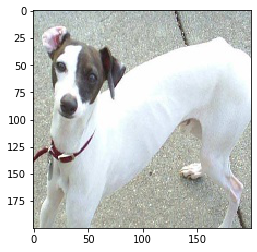

In [26]:
import matplotlib.image as mimg
plt.imshow(plt.imread('/data/training/dogs/dog5728.jpg'))

**Splitting the data into training and validation**

In [0]:
import numpy as np

In [28]:
(X_train, Y_train) = ((np.array(training_images)), np.array(training_labels))
(X_validation, Y_validation) = ((np.array(validation_images)), np.array(validation_labels))
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((19998, 200, 200, 3), (5000, 200, 200, 3), (19998,), (5000,))

In [29]:
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_validation = Y_validation.reshape((Y_validation.shape[0], 1))
Y_train.shape, Y_validation.shape

((19998, 1), (5000, 1))

In [0]:
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')

In [0]:
X_train /= 255

In [0]:
X_validation /= 255

**Building CNN Model for Classification**

In [0]:
from tensorflow import keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout

In [0]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]
(img_rows, img_cols)

(200, 200)

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [0]:
def define_model():
  model=VGG16(include_top=False,input_shape=(img_rows,img_cols,3))
  for layer in model.layers:
    layer.trainable=False
  
  flat1=Flatten()(model.layers[-1].output)
  class1=Dense(128,activation='relu',kernel_initializer='he_uniform')(flat1)
  output=Dense(1,activation='sigmoid')(class1)

  model=Model(inputs=model.inputs,outputs=output)

  opt=Adam(learning_rate=0.0005)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory('/data/training/',target_size=(img_rows, img_cols),batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('/data/validation/', target_size=(img_rows, img_cols), batch_size=32, class_mode='binary')

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [0]:
model = define_model()

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [0]:
checkpoint = ModelCheckpoint("/data/cnn_model1_transfer.h5",monitor='val_loss',verbose=1,save_best_only=True,mode='min')
earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
cb=[checkpoint, earlystop, reduce_lr]

In [53]:
history = model.fit_generator(train_generator, steps_per_epoch = len(train_generator), validation_data = test_generator, validation_steps = len(test_generator), epochs = 50,callbacks=cb)

Epoch 1/50
624/625 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.8854
Epoch 00001: val_loss improved from inf to 0.23264, saving model to /data/cnn_model1_transfer.h5
625/625 [==============================] - 179s 286ms/step - loss: 0.2664 - accuracy: 0.8854 - val_loss: 0.2326 - val_accuracy: 0.9054
Epoch 2/50
624/625 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9178
Epoch 00002: val_loss improved from 0.23264 to 0.17662, saving model to /data/cnn_model1_transfer.h5
625/625 [==============================] - 178s 285ms/step - loss: 0.1965 - accuracy: 0.9178 - val_loss: 0.1766 - val_accuracy: 0.9292
Epoch 3/50
624/625 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.9245
Epoch 00003: val_loss did not improve from 0.17662
625/625 [==============================] - 178s 285ms/step - loss: 0.1821 - accuracy: 0.9245 - val_loss: 0.2235 - val_accuracy: 0.9084
Epoch 4/50
624/625 [============================>.] - ETA:

Text(0.5, 1.0, 'Loss Graph')

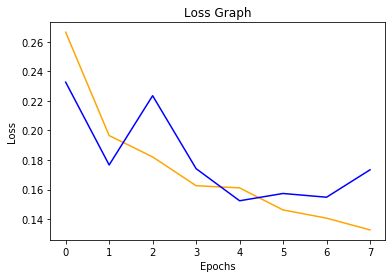

In [54]:
plt.plot(history.history['loss'],color='orange',label='Train Loss')
plt.plot(history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')